## Dataset Preprocessing

# A Dataset

## Split

dataset images with image size 256X256 pixels

In [1]:
import os
import shutil
import random
from pathlib import Path

def split_dataset(dir, split_ratio=(0.7, 0.15, 0.15)):
    random.seed(42)

    train_folder = os.path.join(dir, 'train')
    val_folder = os.path.join(dir, 'val')
    test_folder = os.path.join(dir, 'test')

    for folder in [train_folder, val_folder, test_folder]:
        os.makedirs(folder, exist_ok=True)
        os.makedirs(os.path.join(folder, '0'), exist_ok=True)
        os.makedirs(os.path.join(folder, '1'), exist_ok=True)

    for label in ['0', '1']:
        label_folder = os.path.join(dir, label)
        images = os.listdir(label_folder)
        random.shuffle(images)

        train_size = int(split_ratio[0] * len(images))
        val_size = int(split_ratio[1] * len(images))

        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        for image in train_images:
            src_path = os.path.join(label_folder, image)
            dest_path = os.path.join(train_folder, label, image)
            shutil.copy(src_path, dest_path)

        for image in val_images:
            src_path = os.path.join(label_folder, image)
            dest_path = os.path.join(val_folder, label, image)
            shutil.copy(src_path, dest_path)

        for image in test_images:
            src_path = os.path.join(label_folder, image)
            dest_path = os.path.join(test_folder, label, image)
            shutil.copy(src_path, dest_path)

In [3]:
#floodNet 
split_dataset(r'D:\Datasets\Classification\floodnet')

In [4]:
#AIDER
split_dataset(r'D:\Datasets\Classification\AIDER')

In [5]:
#AIDER
split_dataset(r'D:\Datasets\Classification\Flood Area Segmentation')

In [8]:
import os
import shutil

def combine_datasets(source_dir, destination_dir):
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    for split in ['train', 'test', 'val']:
        split_source_dir = os.path.join(source_dir, split)
        split_destination_dir = os.path.join(destination_dir, split)

        if not os.path.exists(split_destination_dir):
            os.makedirs(split_destination_dir)

        for class_folder in os.listdir(split_source_dir):
            class_source_dir = os.path.join(split_source_dir, class_folder)
            class_destination_dir = os.path.join(split_destination_dir, class_folder)

            if not os.path.exists(class_destination_dir):
                os.makedirs(class_destination_dir)

            for filename in os.listdir(class_source_dir):
                source_path = os.path.join(class_source_dir, filename)
                destination_path = os.path.join(class_destination_dir, filename)
                shutil.copy(source_path, destination_path)


In [9]:
source_directory = r'D:\Datasets\Classification\floodnet'
destination_directory = r'D:\Datasets\Classification\A'

combine_datasets(source_directory, destination_directory)

In [10]:
source_directory = r'D:\Datasets\Classification\AIDER'
destination_directory = r'D:\Datasets\Classification\A'

combine_datasets(source_directory, destination_directory)

In [11]:
source_directory = r'D:\Datasets\Classification\Flood Area Segmentation'
destination_directory = r'D:\Datasets\Classification\A'

combine_datasets(source_directory, destination_directory)

In [14]:
print(f'Training images for flood: {len(os.listdir(os.path.join(destination_directory, "train", "0")))}')
print(f'Validation images for flood: {len(os.listdir(os.path.join(destination_directory, "val", "0")))}')
print(f'Test images for flood: {len(os.listdir(os.path.join(destination_directory, "test", "0")))}')

print(f'Training images for non-flood: {len(os.listdir(os.path.join(destination_directory, "train", "1")))}')
print(f'Validation images for non-flood: {len(os.listdir(os.path.join(destination_directory, "val", "1")))}')
print(f'Test images for non-flood: {len(os.listdir(os.path.join(destination_directory, "test", "1")))}')

Training images for flood: 3315
Validation images for flood: 710
Test images for flood: 712
Training images for non-flood: 606
Validation images for non-flood: 128
Test images for non-flood: 133


In [17]:
import os
import numpy as np
import pickle
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

def preprocess_images(data_dir, img_size):
    images = []
    labels = []

    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        
        for image_file in tqdm(os.listdir(label_path)):
            image_path = os.path.join(label_path, image_file)
            
            img = load_img(image_path, target_size=img_size)
            img_array = img_to_array(img)
            
            img_array /= 255.0
            
            images.append(img_array)
            labels.append(int(label)) 

    return np.array(images), np.array(labels)

def create_data_arrays(dir, img_size, output_dir):
    images, labels = preprocess_images(dir, img_size)

    train_indices = np.arange(len(images))
    np.random.seed(45)
    np.random.shuffle(train_indices)
    train_images = images[train_indices]
    train_labels = labels[train_indices]

    print(f"Training images shape: {train_images.shape}")
    print(f"Training labels shape: {train_labels.shape}")

    with open(output_dir, 'wb') as f:
        pickle.dump((train_images, train_labels), f)

#### floodNet dataset pickle files for training, validation, and testing

In [23]:
input_dataset_folder = r"D:\Datasets\Classification\floodnet\train"
pickle_folder = r"D:\My Code\Classification\pickle_data\floodnet_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 35/35 [00:04<00:00,  7.89it/s]


Training images shape: (277, 256, 256, 3)
Training labels shape: (277,)


In [24]:
input_dataset_folder = r"D:\Datasets\Classification\floodnet\val"
pickle_folder = r"D:\My Code\Classification\pickle_data\floodnet_validation.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 7/7 [00:00<00:00,  7.50it/s]


Training images shape: (59, 256, 256, 3)
Training labels shape: (59,)


In [25]:
input_dataset_folder = r"D:\Datasets\Classification\floodnet\test"
pickle_folder = r"D:\My Code\Classification\pickle_data\floodnet_testing.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 9/9 [00:01<00:00,  8.24it/s]


Training images shape: (62, 256, 256, 3)
Training labels shape: (62,)


#### AIDER dataset pickle files for training, validation, and testing

In [26]:
input_dataset_folder = r"D:\Datasets\Classification\AIDER\train"
pickle_folder = r"D:\My Code\Classification\pickle_data\AIDER_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 368/368 [00:01<00:00, 273.52it/s]


Training images shape: (3441, 256, 256, 3)
Training labels shape: (3441,)


In [27]:
input_dataset_folder = r"D:\Datasets\Classification\AIDER\val"
pickle_folder = r"D:\My Code\Classification\pickle_data\AIDER_validation.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 78/78 [00:00<00:00, 214.86it/s]


Training images shape: (736, 256, 256, 3)
Training labels shape: (736,)


In [28]:
input_dataset_folder = r"D:\Datasets\Classification\AIDER\test"
pickle_folder = r"D:\My Code\Classification\pickle_data\AIDER_testing.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 80/80 [00:00<00:00, 215.05it/s]


Training images shape: (739, 256, 256, 3)
Training labels shape: (739,)


#### Combined dataset pickle files for training, validation, and testing

In [29]:
input_dataset_folder = r"D:\Datasets\Classification\A\train"
pickle_folder = r"D:\My Code\Classification\pickle_data\A_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 606/606 [00:13<00:00, 44.99it/s] 


Training images shape: (3921, 256, 256, 3)
Training labels shape: (3921,)


In [30]:
input_dataset_folder = r"D:\Datasets\Classification\A\val"
pickle_folder = r"D:\My Code\Classification\pickle_data\A_validation.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 128/128 [00:02<00:00, 49.94it/s]


Training images shape: (838, 256, 256, 3)
Training labels shape: (838,)


In [31]:
input_dataset_folder = r"D:\Datasets\Classification\A\test"
pickle_folder = r"D:\My Code\Classification\pickle_data\A_testing.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 133/133 [00:02<00:00, 46.25it/s]


Training images shape: (845, 256, 256, 3)
Training labels shape: (845,)


-------------------

## Augmentation for A

In [32]:
import os
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [66]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def save_pickle(data, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)
        
def display_images(images, labels, num_images=2):
    for i in range(num_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()

def augment_images(images, labels, augmented_images, augmented_labels, augmentations_per_class=None):
    datagen = ImageDataGenerator(
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
    )

    if augmentations_per_class is None:
        augmentations_per_class = {} 

    for i in range(len(images)):
        x = images[i]
        x = x.reshape((1,) + x.shape)

        current_label = labels[i]
        num_augmentations = augmentations_per_class.get(current_label, 0)
        
        for j, batch in enumerate(datagen.flow(x, batch_size=1)):
            augmented_images.append(batch[0])
            augmented_labels.append(current_label)

            num_augmentations -= 1
            if num_augmentations <= 0:
                break

def save_images_and_labels(images, labels, save_path, prefix="augmented"):
    for i in range(len(images)):
        image = Image.fromarray((images[i]*255).astype(np.uint8))
        label = labels[i]

        label_folder = os.path.join(save_path, str(label))
        os.makedirs(label_folder, exist_ok=True)

        image_path = os.path.join(label_folder, f"{prefix}-{i}.jpg")
        image.save(image_path)



In [61]:
data_saved_dir = r'D:\My Code\Classification\pickle_data'

train_val_data_path = os.path.join(data_saved_dir, 'A_training.pkl')
train_images, train_labels = load_pickle(train_val_data_path)

unique_values, counts = np.unique(train_labels, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Occurrences: {count}")

Value: 0, Occurrences: 3315
Value: 1, Occurrences: 606


In [62]:
print(f"Training images of shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print("-------------------------------------------\n")

train_augmented_images = []
train_augmented_labels = []

augment_images(train_images, train_labels, train_augmented_images, train_augmented_labels, {0: -1, 1: 4})

print(f"Augmented training images shape: {np.array(train_augmented_images).shape}")
print(f"Augmented training labels shape: {np.array(train_augmented_labels).shape}")
print("-------------------------------------------\n")

Training images of shape: (3921, 256, 256, 3)
Training labels shape: (3921,)
-------------------------------------------

Augmented training images shape: (5739, 256, 256, 3)
Augmented training labels shape: (5739,)
-------------------------------------------



In [63]:
unique_values, counts = np.unique(train_augmented_labels, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Occurrences: {count}")

Value: 0, Occurrences: 3315
Value: 1, Occurrences: 2424


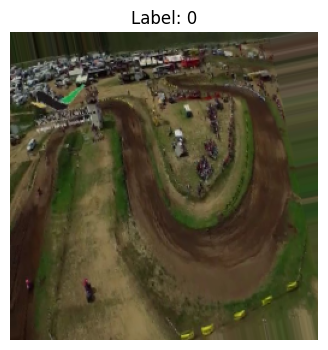

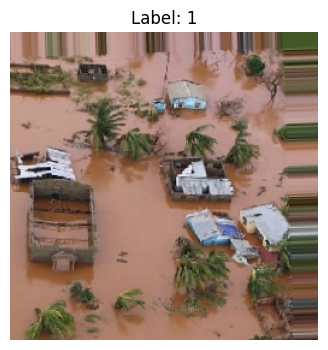

In [64]:
display_images(train_augmented_images, train_augmented_labels)

In [67]:
save_images_and_labels(train_augmented_images, train_augmented_labels, r'D:\Datasets\Classification\A (augmented)\train', prefix="augmented")

In [71]:
input_dataset_folder = r"D:\Datasets\Classification\A (augmented)\train"
pickle_folder = r"D:\My Code\Classification\pickle_data\A_augmented_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 3030/3030 [00:34<00:00, 88.02it/s] 


Training images shape: (6345, 256, 256, 3)
Training labels shape: (6345,)


# B dataset

#### Downloaded images split

In [68]:
#Google Images 
split_dataset(r'D:\Datasets\Classification\Downloaded')

In [75]:
input_dataset_folder = r"D:\Datasets\Classification\Downloaded\train"
pickle_folder = r"D:\My Code\Classification\pickle_data\Downloaded_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 429/429 [00:00<00:00, 575.83it/s]


Training images shape: (665, 256, 256, 3)
Training labels shape: (665,)


In [76]:
input_dataset_folder = r"D:\Datasets\Classification\Downloaded\val"
pickle_folder = r"D:\My Code\Classification\pickle_data\Downloaded_validation.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 91/91 [00:00<00:00, 608.29it/s]


Training images shape: (141, 256, 256, 3)
Training labels shape: (141,)


In [77]:
input_dataset_folder = r"D:\Datasets\Classification\Downloaded\test"
pickle_folder = r"D:\My Code\Classification\pickle_data\Downloaded_testing.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 93/93 [00:00<00:00, 237.27it/s]


Training images shape: (145, 256, 256, 3)
Training labels shape: (145,)


------------

#### B dataset split

In [69]:
combine_datasets(r'D:\Datasets\Classification\A', r'D:\Datasets\Classification\B')
combine_datasets(r'D:\Datasets\Classification\Downloaded', r'D:\Datasets\Classification\B')

Note: No need of split becuase the data is already splitted

In [78]:
input_dataset_folder = r"D:\Datasets\Classification\B\train"
pickle_folder = r"D:\My Code\Classification\pickle_data\B_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 1035/1035 [00:21<00:00, 48.58it/s]


Training images shape: (4586, 256, 256, 3)
Training labels shape: (4586,)


In [79]:
input_dataset_folder = r"D:\Datasets\Classification\B\val"
pickle_folder = r"D:\My Code\Classification\pickle_data\B_validation.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 219/219 [00:05<00:00, 40.13it/s]


Training images shape: (979, 256, 256, 3)
Training labels shape: (979,)


In [80]:
input_dataset_folder = r"D:\Datasets\Classification\B\test"
pickle_folder = r"D:\My Code\Classification\pickle_data\B_testing.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 226/226 [00:03<00:00, 61.36it/s] 


Training images shape: (990, 256, 256, 3)
Training labels shape: (990,)


--------------------

In [81]:
data_saved_dir = r'D:\My Code\Classification\pickle_data'

train_val_data_path = os.path.join(data_saved_dir, 'B_training.pkl')
train_images, train_labels = load_pickle(train_val_data_path)

unique_values, counts = np.unique(train_labels, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Occurrences: {count}")

Value: 0, Occurrences: 3551
Value: 1, Occurrences: 1035


In [82]:
print(f"Training images of shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print("-------------------------------------------\n")

train_augmented_images = []
train_augmented_labels = []

augment_images(train_images, train_labels, train_augmented_images, train_augmented_labels, {0: -1, 1: 2})

print(f"Augmented training images shape: {np.array(train_augmented_images).shape}")
print(f"Augmented training labels shape: {np.array(train_augmented_labels).shape}")
print("-------------------------------------------\n")

Training images of shape: (4586, 256, 256, 3)
Training labels shape: (4586,)
-------------------------------------------

Augmented training images shape: (5621, 256, 256, 3)
Augmented training labels shape: (5621,)
-------------------------------------------



In [83]:
unique_values, counts = np.unique(train_augmented_labels, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Occurrences: {count}")

Value: 0, Occurrences: 3551
Value: 1, Occurrences: 2070


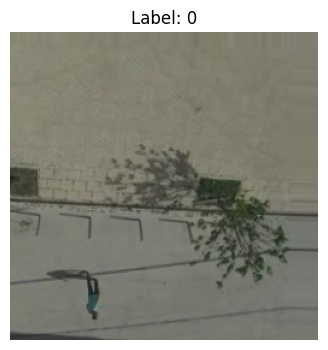

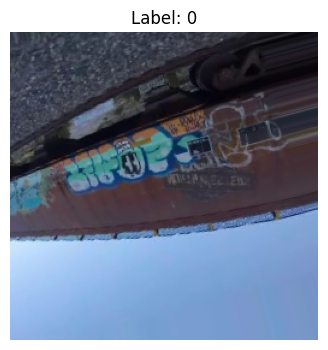

In [84]:
display_images(train_augmented_images, train_augmented_labels)

In [85]:
save_images_and_labels(train_augmented_images, train_augmented_labels, r'D:\Datasets\Classification\B (augmented)\train', prefix="augmented")

In [86]:
input_dataset_folder = r"D:\Datasets\Classification\B (augmented)\train"
pickle_folder = r"D:\My Code\Classification\pickle_data\B_augmented_training.pkl"
img_size = (256, 256)
create_data_arrays(input_dataset_folder, img_size, pickle_folder)

100%|██████████| 3105/3105 [00:34<00:00, 91.19it/s] 


Training images shape: (6656, 256, 256, 3)
Training labels shape: (6656,)
